In [1]:
import sys
sys.path.append('F:/study/ML_project/ML_AI_project_HuiShi') # --> change here

from functions import vgg16, KNN, standard_scaler, read_data, cal_metrics
import numpy as np

SEED = 1
np.random.seed(SEED)
RAND_STATE = 1
root = "F:/study/ML_project/ML_AI_project_HuiShi/LISA_traffic_light_detection.v3i.multiclass" # --> change here
train_folder_path, test_folder_path, train_labels, test_labels = read_data.read_data(root) # read the dataset

In [2]:
# extract features using vgg16
# normalization_std = [0.229, 0.224, 0.225]
# normalization_mean = [0.485, 0.456, 0.406]
mean = [0.19240434, 0.16837405, 0.20262092]
std = [0.18612613, 0.17387361, 0.19018272]
features_train, labels_train, features_test, labels_test = vgg16.extract_features_and_labels(mean, std, train_folder_path, test_folder_path, train_labels,test_labels)

c:\Users\86180\miniconda3\envs\deepLearning\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\86180\miniconda3\envs\deepLearning\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). T

Accuracy: 0.7456
Precision: 0.8073
Recall: 0.7845
F1 Score: 0.8025
Confusion Matrix for Label go:
[[377  44]
 [122 357]]



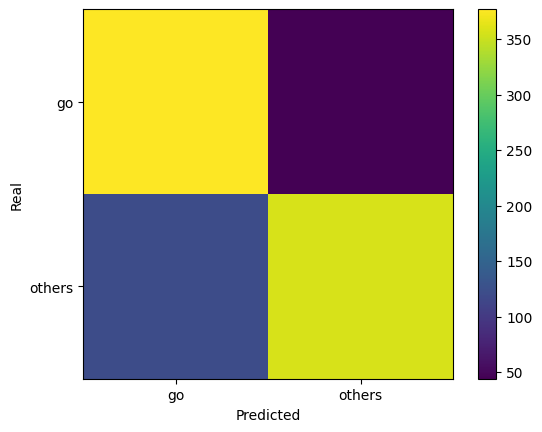

Confusion Matrix for Label stop:
[[451  51]
 [ 73 325]]



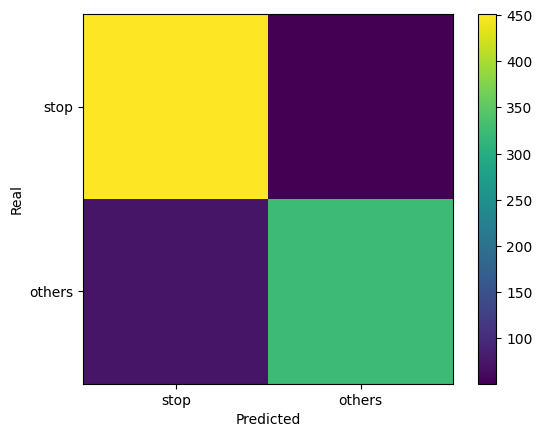

Confusion Matrix for Label warning:
[[693  91]
 [ 19  97]]



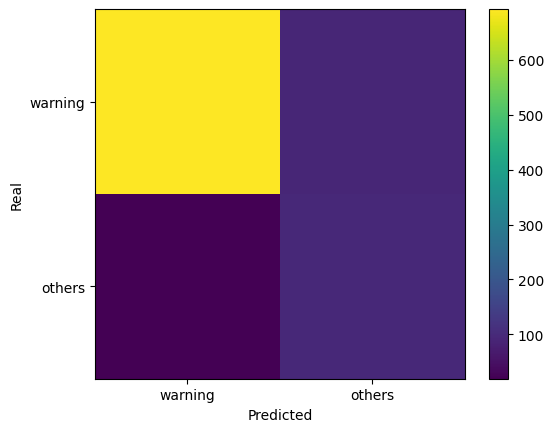

In [3]:
# KNN
# Multi target classification, fitting one classifier per target (one-vs-rest).
# Multi-output targets predicted across multiple predictors.
n_neighbors = 5
y_pred = KNN.multi_output_classifier(n_neighbors, features_train, labels_train, features_test)

# print Accuracy, Precision, Recall, F1 Score
# Compute and plot a confusion matrix for each class (one-vs-rest)
cal_metrics.cal_metrics(labels_test, y_pred)